# 7 - Bande di Bollinger ed MACD

## Caricamento librerie/moduli

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import metcomputlib as mc
import myownlib as my

In [2]:
mc.Ver()

------------------------------------------------------------------------------------------
Sunday, March 16, 2025, 16:11:32
Platform : macOS-15.3.2-arm64-arm-64bit
------------------------------------------------------------------------------------------
Python 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]
JupyterLab 4.3.4
------------------------------------------------------------------------------------------
Matplotlib 3.9.2
Pandas 2.2.2
NumPy 1.26.4
SciPy 1.13.1
------------------------------------------------------------------------------------------


## Caricamento Dati

In [3]:
# load AAPL.csv in a DataFrame
Aapl = mc.ReadStockPrices('AAPL.csv')

# define the time period of interest
day1 = np.datetime64('2000-01-01')
day2 = np.datetime64('2000-02-15')

In [4]:
# extract single columns from DataFrame
D = Aapl['Date'].values
O = Aapl['Open'].values
H = Aapl['High'].values
L = Aapl['Low'].values
C = Aapl['Close'].values
V = Aapl['Volume'].values

## Calcolo Bande Bollinger ed MACD Lines

In [5]:
p=20
ds=2
Btop, Bmedian, Bbottom = my.Bollinger(C, p, ds)

In [6]:
ps=12
pl=26
pg=9
macd, signal, macdhist = my.Macd(C, ps, pl, pg)

## Figura con function da libreria myownlib.py

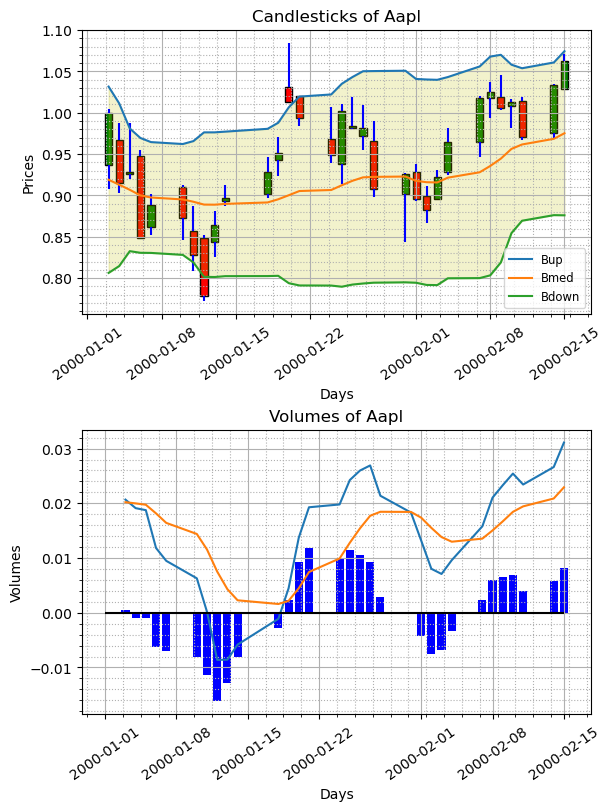

In [7]:
plt.figure(figsize=(6, 8), layout='constrained')
# First subplot
plt.subplot(2, 1, 1)
my.PlotCandles(D, O, H, L, C, day1, day2)
my.PlotData(D, Btop, day1, day2, Label='Bup')
my.PlotData(D, Bmedian, day1, day2, Label='Bmed')
my.PlotData(D, Bbottom, day1, day2, Label='Bdown')
mc.FillBetween(D, Btop, Bbottom, day1, day2, Color='y')
mc.EndChart(Legend='on', Xlabel='Days', Ylabel='Prices', Title='Candlesticks of Aapl')
# Second subplot
plt.subplot(2, 1, 2)
my.PlotData(D, macd, day1, day2, Label='MACD Line')
my.PlotData(D, signal, day1, day2, Label='Signal Line')
my.PlotBars(D, macdhist, day1, day2, Color='b')
plt.hlines(y=0, xmin=day1, xmax=day2, linewidth=1.5, color='k')
mc.EndChart(Xlabel='Days', Ylabel='Volumes', Title='Volumes of Aapl')
#
plt.show()